In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

- df_panel: son todas las obs. 

In [112]:
df_panel1 = pd.read_csv(os.path.join('DATA', 'df_panel1_.csv')) 

In [8]:
# voy a agrupar textil y apparel
# textil: 63 y 59 == 59
# apparel: 62 y 61 == 61 
df_panel1.loc[df_panel1.code2 == 63, 'code2'] = 59
df_panel1.loc[df_panel1.code2 == 62, 'code2'] = 61

In [ ]:
# \begin{table}[H]
# \caption{Segment classification}
# \centering
# \footnotesize
# \begin{tabular}{ll}
# \toprule
# code2 &                                            Segment \\
# \midrule
#    87 & Vehicles; other than railway or tramway rolling stock, and parts and \\ 
#       & accessories thereof \\
#    64 & Footwear; gaiters and the like; parts of such articles \\
#    85 & Electrical machinery and equipment and parts thereof; sound recorders \\      
#       & and reproducers; television image and sound recorders and reproducers \\
#       & parts and accessories of such articles \\
#    94 & Furniture; bedding, mattresses, mattress supports, cushions and similar \\
#       & stuffed furnishings; \\ 
#       & lamps and lighting fittings, n.e.s.; illuminated signs, illuminated name \\
#    63 & Textiles, made up articles; sets; worn clothing and worn textile articles; \\
#       & rags \\
#    62 & Apparel and clothing accessories; not knitted or crocheted \\
#    61 & Apparel and clothing accessories; knitted or crocheted \\
#    59 & Textile fabrics; impregnated, coated, covered or laminated; \\ 
#       & textile articles of a kind suitable for industrial use \\
#    95 & Toys, games and sports requisites; parts and accessories thereof \\
# \bottomrule
# \end{tabular}
# \label{tab:segments}
# \end{table}

In [9]:
df_panel1['code2'].unique()

array([85, 87, 61, 59, 64, 94, 95], dtype=int8)

In [10]:
df_panel1 = df_panel1[['gvkey_hscode6', 'gvkey', 'hscode6', 'code2', 'sigmar', 'dap', 'sales', 'mkval', 'gm']]

In [11]:
df_panel1.columns

Index(['gvkey_hscode6', 'gvkey', 'hscode6', 'code2', 'sigmar', 'dap', 'sales',
       'mkval', 'gm'],
      dtype='object')

In [12]:
df_panel1.head()

,gvkey_hscode6,gvkey,hscode6,code2,sigmar,dap,sales,mkval,gm
0,10000_850440,10000,850440,85,0.000000,NaN,NaN,NaN,NaN
1,10000_850440,10000,850440,85,0.579382,NaN,NaN,NaN,NaN
2,10000_850440,10000,850440,85,0.310041,NaN,NaN,NaN,NaN
3,10000_850440,10000,850440,85,0.158140,1.117381,179.350998,223.676193,0.262630
4,10000_850440,10000,850440,85,0.311269,1.067248,231.048004,182.365906,0.267377


In [13]:
df_panel1 = df_panel1.dropna()

In [14]:
# Numero de firmas
def get_firms():
    df = df_panel1[['gvkey', 'code2']].groupby('code2').nunique()
    total = df.sum()
    total.name = 'Total'
    df = df.append(total.transpose())
    df.reset_index(inplace=True)
    df.rename(columns={"gvkey": "Firms"}, inplace=True)
    df.set_index('code2', inplace=True)
    return df

In [15]:
get_firms()

,Firms
code2,
59,114
61,180
64,78
85,374
87,217
94,232
95,206
Total,1401


In [16]:
# Numero de observaciones (data points)
def get_points():
    df = df_panel1[['gvkey', 'code2']].groupby('code2').count()
    total = df.sum()
    total.name = 'Total'
    df = df.append(total.transpose())
    df.reset_index(inplace=True)
    df.rename(columns={"gvkey": "Obs."}, inplace=True)
    df.set_index('code2', inplace=True)
    return df

In [17]:
get_points()

,Obs.
code2,
59,6443
61,28998
64,6670
85,37593
87,14320
94,21442
95,10814
Total,126280


In [18]:
def get_firm_product():
    df = df_panel1[['gvkey_hscode6', 'code2']].groupby('code2').nunique()
    total = df.sum()
    total.name = 'Total'
    df = df.append(total.transpose())
    df.reset_index(inplace=True)
    df.rename(columns={"gvkey_hscode6": "Firm-Product"}, inplace=True)
    df.set_index('code2', inplace=True)
    return df

In [19]:
get_firm_product()

,Firm-Product
code2,
59,220
61,964
64,208
85,1294
87,460
94,715
95,374
Total,4235


In [20]:
# ['gvkey_hscode6', 'code2', 'sigmar', 'dap', 'sales', 'mkval', 'gm']

In [21]:
# mean
def get_mean():
    df = df_panel1[['sigmar', 'dap', 'sales', 'mkval', 'gm', 'code2']].groupby('code2').mean()
    total = df.mean()
    total.name = 'Total'
    df = df.append(total.transpose())
    return df

In [22]:
get_mean()

,sigmar,dap,sales,mkval,gm
code2,,,,,
59,1.003595,1.044334,12802.199219,40722.308594,0.372081
61,1.032287,1.045398,8740.090820,38065.062500,0.439304
64,1.094976,1.064776,10375.897461,45891.910156,0.412987
85,0.885115,1.070036,7320.414062,36344.691406,0.351010
87,1.023466,1.020977,7991.368164,28325.548828,0.299190
94,1.093333,1.064144,10279.138672,40710.800781,0.344258
95,1.018255,1.075105,8585.748047,41483.367188,0.364594
Total,1.021575,1.054967,9442.123047,38791.957031,0.369060


In [23]:
def get_df_mean():
    df = pd.concat([get_firms(), get_points(), get_firm_product(), get_mean()], axis='columns')

    cols = ['Firms', 'Obs.', 'sales', 'mkval']
    for col in cols:
        df.loc[:, col] = df[col].map('{:,.0f}'.format)

    df.loc[:, 'gm'] = df['gm'].map('{:,.2f}'.format)
    df.loc[:, 'sigmar'] = df['sigmar'].map('{:,.2f}'.format)
    df.loc[:, 'dap'] = df['dap'].map('{:,.2f}'.format)

    return df

In [24]:
df_mean = get_df_mean()
df_mean

,Firms,Obs.,Firm-Product,sigmar,dap,sales,mkval,gm
code2,,,,,,,,
59,114,"6,443",220,1.00,1.04,"12,802","40,722",0.37
61,180,"28,998",964,1.03,1.05,"8,740","38,065",0.44
64,78,"6,670",208,1.09,1.06,"10,376","45,892",0.41
85,374,"37,593",1294,0.89,1.07,"7,320","36,345",0.35
87,217,"14,320",460,1.02,1.02,"7,991","28,326",0.30
94,232,"21,442",715,1.09,1.06,"10,279","40,711",0.34
95,206,"10,814",374,1.02,1.08,"8,586","41,483",0.36
Total,"1,401","126,280",4235,1.02,1.05,"9,442","38,792",0.37


In [26]:
# standard deviation
def get_sd():
    df = df_panel1[['sigmar', 'dap', 'sales', 'mkval', 'gm', 'code2']].groupby('code2').std()
    total = df.std()
    total.name = 'Total'
    df = df.append(total.transpose())
    return df

In [27]:
get_sd()

,sigmar,dap,sales,mkval,gm
code2,,,,,
59,0.908316,0.428902,29960.557908,76240.450259,0.184560
61,0.924199,0.411836,23410.132055,84321.078902,0.226629
64,0.962997,0.549175,25192.138575,97011.019732,0.802754
85,0.878353,0.610577,16569.343380,74718.910092,0.172660
87,0.944666,0.296883,15712.028120,64051.260628,0.330051
94,1.017804,0.807608,24024.271551,84775.971407,0.707492
95,0.970852,0.787051,20137.457204,92668.646329,0.932953
Total,0.045651,0.193130,5033.247955,11258.934379,0.323912


In [28]:
def get_df_sd():
    df = get_sd()

    df.loc[:, 'sales'] = '(' + df['sales'].map('{:,.0f}'.format) + ')'
    df.loc[:, 'mkval'] = '(' + df['mkval'].map('{:,.0f}'.format) + ')'

    df.loc[:, 'gm'] = '(' + df['gm'].map('{:,.2f}'.format) + ')'
    df.loc[:, 'sigmar'] = '(' + df['sigmar'].map('{:,.2f}'.format) + ')'
    df.loc[:, 'dap'] = '(' + df['dap'].map('{:,.2f}'.format) + ')'

    return df

In [29]:
df_sd = get_df_sd()
df_sd

,sigmar,dap,sales,mkval,gm
code2,,,,,
59,(0.91),(0.43),"(29,961)","(76,240)",(0.18)
61,(0.92),(0.41),"(23,410)","(84,321)",(0.23)
64,(0.96),(0.55),"(25,192)","(97,011)",(0.80)
85,(0.88),(0.61),"(16,569)","(74,719)",(0.17)
87,(0.94),(0.30),"(15,712)","(64,051)",(0.33)
94,(1.02),(0.81),"(24,024)","(84,776)",(0.71)
95,(0.97),(0.79),"(20,137)","(92,669)",(0.93)
Total,(0.05),(0.19),"(5,033)","(11,259)",(0.32)


In [30]:
code2 = []
for row in df_sd.index:
    code2.extend([row, ''])

In [31]:
firms = []
for row in df_sd.index:
    firms.extend([df_mean.loc[:, 'Firms'][row], ''])

In [32]:
obs = [] 
for row in df_sd.index:
    obs.extend([df_mean.loc[:, 'Obs.'][row], ''])

In [33]:
firm_product = [] 
for row in df_sd.index:
    firm_product.extend([df_mean.loc[:, 'Firm-Product'][row], ''])

In [34]:
dictio = dict()
dictio['code2'] = code2
dictio['Firms'] = firms
dictio['Obs.'] = obs
dictio['Firm-Product'] = firm_product

In [36]:
cols = ['sigmar', 'dap', 'sales', 'mkval', 'gm']
for col in cols:
    lista = []
    for row in df_sd.index:
        lista.extend([df_mean.loc[:, col][row], df_sd.loc[:, col][row]])  
    dictio[col] = lista

In [37]:
for k, v in dictio.items():
    print(k)
    print(len(v))

code2
16
Firms
16
Obs.
16
Firm-Product
16
sigmar
16
dap
16
sales
16
mkval
16
gm
16


In [38]:
pd.DataFrame(dictio)

,code2,Firms,Obs.,Firm-Product,sigmar,dap,sales,mkval,gm
0,59,114,"6,443",220,1.00,1.04,"12,802","40,722",0.37
1,,,,,(0.91),(0.43),"(29,961)","(76,240)",(0.18)
2,61,180,"28,998",964,1.03,1.05,"8,740","38,065",0.44
3,,,,,(0.92),(0.41),"(23,410)","(84,321)",(0.23)
4,64,78,"6,670",208,1.09,1.06,"10,376","45,892",0.41
5,,,,,(0.96),(0.55),"(25,192)","(97,011)",(0.80)
6,85,374,"37,593",1294,0.89,1.07,"7,320","36,345",0.35
7,,,,,(0.88),(0.61),"(16,569)","(74,719)",(0.17)
8,87,217,"14,320",460,1.02,1.02,"7,991","28,326",0.30
9,,,,,(0.94),(0.30),"(15,712)","(64,051)",(0.33)


In [39]:
print(pd.DataFrame(dictio).to_latex(index=False, formatters={"name": str.upper})) 

\begin{tabular}{lllllllll}
\toprule
code2 & Firms &    Obs. & Firm-Product & sigmar &    dap &    sales &    mkval &     gm \\
\midrule
   59 &   114 &   6,443 &          220 &   1.00 &   1.04 &   12,802 &   40,722 &   0.37 \\
      &       &         &              & (0.91) & (0.43) & (29,961) & (76,240) & (0.18) \\
   61 &   180 &  28,998 &          964 &   1.03 &   1.05 &    8,740 &   38,065 &   0.44 \\
      &       &         &              & (0.92) & (0.41) & (23,410) & (84,321) & (0.23) \\
   64 &    78 &   6,670 &          208 &   1.09 &   1.06 &   10,376 &   45,892 &   0.41 \\
      &       &         &              & (0.96) & (0.55) & (25,192) & (97,011) & (0.80) \\
   85 &   374 &  37,593 &         1294 &   0.89 &   1.07 &    7,320 &   36,345 &   0.35 \\
      &       &         &              & (0.88) & (0.61) & (16,569) & (74,719) & (0.17) \\
   87 &   217 &  14,320 &          460 &   1.02 &   1.02 &    7,991 &   28,326 &   0.30 \\
      &       &         &              & (0.9

In [203]:
# df_panel2 = pd.read_csv(os.path.join('DATA', 'df_panel2_.csv')) 
df_panel2 = pd.read_stata(os.path.join('DATA', 'df_panel2_.dta')) 

In [208]:
df_panel2.shape

(4382, 58)

In [205]:
df_panel2.columns

Index(['v1', 'unnamed0', 'gvkey_hscode6', 'vol', 'code2', 'month', 'quarter',
       't', 'v10', 'v11', 'v12', 'v13', 'vol_log', 't_log', 'vol_log_hat', 'r',
       'sigmar', 'source1', 'n', 'v21', 'despues', 'antes', 'consistency_8',
       'consistency_china', 'consistency_no_china', 'gvkey', 'hscode6',
       'china_out', 'china_inn', 't1', 't2', 'year', 'date', 'ap', 'cogs',
       'icap', 'inv', 'invtq', 'ppent', 'sales', 'mkval', 'invr', 'gm', 'id',
       'log_sigmar', 'log_inv', 'log_icap', 'log_ppent', 'log_sales',
       'log_mkval', 'log_cogs', 'log_gm', 'tend', 'dap_median', 'dap',
       'log_dap', '_est_est_1', '_est_est_2'],
      dtype='object')

In [217]:
df = pd.DataFrame(df_panel2[['gvkey_hscode6', 'source1']].groupby('gvkey_hscode6')['source1'].nunique())
df.reset_index(inplace=True)
df_panel2 = df_panel2[~df_panel2['gvkey_hscode6'].isin(df[df['source1']==1]['gvkey_hscode6'])]
df_panel2

,v1,unnamed0,gvkey_hscode6,vol,code2,month,quarter,t,v10,v11,...,log_sales,log_mkval,log_cogs,log_gm,tend,dap_median,dap,log_dap,_est_est_1,_est_est_2
8,46,1205,10016_854442,4.99,85,1,1,4,1,0,...,7.140453,9.127858,6.595917,-0.867765,2.0,91.117035,1.270394,0.819953,1,1
9,47,1206,10016_854442,14.35,85,4,2,5,0,1,...,7.768787,9.032349,7.257708,-0.915910,2.0,91.117035,0.691282,0.525487,1,1
10,48,1207,10016_854442,3.87,85,7,3,6,0,0,...,7.770266,9.227484,7.278077,-0.944914,2.0,91.117035,0.701478,0.531497,1,1
11,49,1208,10016_854442,2.17,85,10,4,7,0,0,...,7.788585,9.316827,7.288039,-0.931912,2.0,91.117035,0.683706,0.520998,1,1
12,50,1209,10016_854442,11.11,85,1,1,8,1,0,...,7.767052,9.463233,7.225627,-0.872078,3.0,91.117035,0.853084,0.616851,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,7042,188393,9899_854442,5.61,85,7,3,38,0,0,...,10.730706,12.405481,9.938179,-0.602756,10.0,131.408234,1.320489,0.841778,1,1
4378,7043,188394,9899_854442,20.84,85,10,4,39,0,0,...,10.779831,12.244416,10.056595,-0.663937,10.0,131.408234,0.804896,0.590503,1,1
4379,7044,188395,9899_854442,11.16,85,1,1,40,1,0,...,10.711502,12.340782,9.939772,-0.620291,11.0,131.408234,1.313666,0.838833,1,1
4380,7045,188396,9899_854442,4.28,85,4,2,41,0,1,...,10.714128,12.408162,9.928765,-0.608721,11.0,131.408234,1.311413,0.837859,1,1


In [218]:
df_panel2.to_csv(os.path.join('DATA', 'df_panel2_.csv'))

In [220]:
df_panel2 = pd.read_csv(os.path.join('DATA', 'df_panel2_.csv')) 

In [223]:
df = df_panel2[['gvkey_hscode6', 'source1', 'date']].groupby(['gvkey_hscode6', 'source1']).first()
df.reset_index(inplace=True)
df_source1 = df[['gvkey_hscode6', 'source1']].copy()
df_source1

,gvkey_hscode6,source1
0,10016_854442,Brazil
1,10016_854442,China
2,10115_850110,China
3,10115_850110,Hong Kong
4,10115_940290,China
...,...,...
359,8823_940360,China
360,9016_850300,Brazil
361,9016_850300,China
362,9899_854442,China


In [224]:
from datetime import datetime
from dateutil import relativedelta
dictio = dict()
for gv_hs in df_source1['gvkey_hscode6'].unique():
    country = list(df_source1[df_source1['gvkey_hscode6']==gv_hs]['source1'])
    dates1 = list(df_panel2[np.logical_and(df_panel2['gvkey_hscode6']==gv_hs, df_panel2['source1']==country[0])]['date'].copy())
    dates2 = list(df_panel2[np.logical_and(df_panel2['gvkey_hscode6']==gv_hs, df_panel2['source1']==country[1])]['date'].copy())
    if dates1[-1] < dates2[0]: dictio[gv_hs] = [country[0], country[1]]
    if dates1[0] > dates2[-1]: dictio[gv_hs] = [country[1], country[0]]

In [225]:
df = pd.DataFrame()
df['gvkey_hscode6'] = dictio.keys()
df['source1'] = [lista[0] for lista in dictio.values()]
df['source2'] = [lista[1] for lista in dictio.values()]
df

,gvkey_hscode6,source1,source2
0,10016_854442,Brazil,China
1,10115_850110,Hong Kong,China
2,10115_940290,China,Germany
3,10198_620342,China,Bangladesh
4,10198_620520,China,Bangladesh
...,...,...,...
168,8446_611120,China,Cambodia
169,8551_870899,China,Hong Kong
170,8823_940360,China,Austria
171,9016_850300,China,Brazil


In [226]:
df.to_csv(os.path.join('DATA', 'df_source.csv'))

In [239]:
df2 = df_panel2[['gvkey_hscode6', 'source1', 'date']].groupby(['gvkey_hscode6', 'source1']).count()
df2.reset_index(inplace=True)
df2

,gvkey_hscode6,source1,date
0,10016_854442,Brazil,8
1,10016_854442,China,18
2,10115_850110,China,33
3,10115_850110,Hong Kong,7
4,10115_940290,China,9
...,...,...,...
359,8823_940360,China,10
360,9016_850300,Brazil,13
361,9016_850300,China,12
362,9899_854442,China,13


In [238]:
df

,gvkey_hscode6,source1,source2
0,10016_854442,Brazil,China
1,10115_850110,Hong Kong,China
2,10115_940290,China,Germany
3,10198_620342,China,Bangladesh
4,10198_620520,China,Bangladesh
...,...,...,...
168,8446_611120,China,Cambodia
169,8551_870899,China,Hong Kong
170,8823_940360,China,Austria
171,9016_850300,China,Brazil


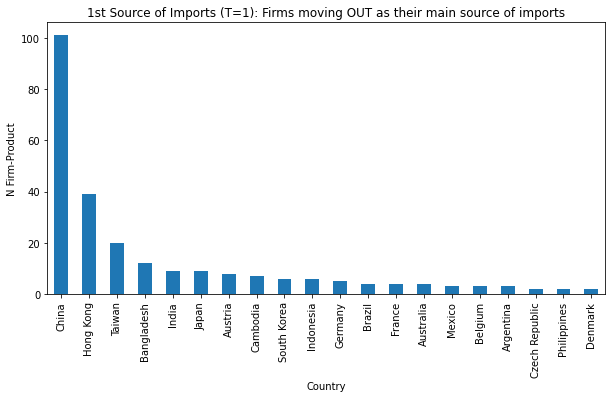

In [93]:
df['source1'].value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("1st Source of Imports (T=1): Firms moving OUT as their main source of imports")
plt.ylabel("N Firm-Product")
plt.xlabel("Country")
plt.savefig('moving_out.png')
plt.show()

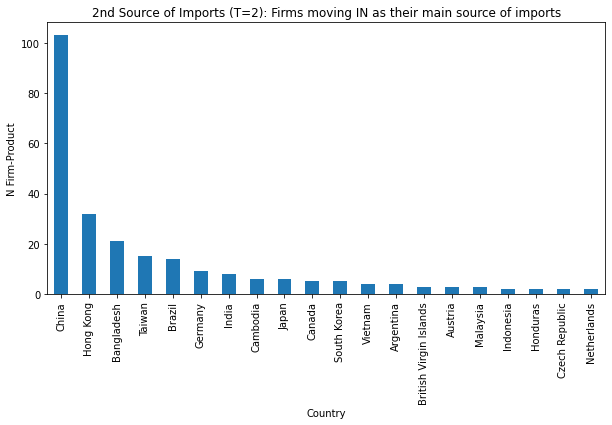

In [88]:
df['source2'].value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("2nd Source of Imports (T=2): Firms moving IN as their main source of imports")
plt.ylabel("N Firm-Product")
plt.xlabel("Country")
plt.savefig('moving_in.png')
plt.show()

In [76]:
set(df['source1']).union(set(df['source2']))

{'Anguilla',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Bermuda',
 'Brazil',
 'British Virgin Islands',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'El Salvador',
 'Finland',
 'France',
 'Germany',
 'Honduras',
 'Hong Kong',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Macau',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Taiwan',
 'Thailand',
 'Turkey',
 'United Kingdom',
 'Vietnam'}

In [84]:
df2 = pd.DataFrame(df[['source1', 'source2']].value_counts())
df2.reset_index(inplace=True)
df2

,source1,source2,0
0,Hong Kong,China,34
1,China,Hong Kong,25
2,China,Bangladesh,14
3,Taiwan,China,14
4,China,Taiwan,12
...,...,...,...
99,Costa Rica,Mexico,1
100,Colombia,China,1
101,China,Sri Lanka,1
102,China,Malaysia,1


In [85]:
df2.to_csv(os.path.join('DATA', 'df_source_to_source.csv'))

In [186]:
df_panel2 = pd.read_csv(os.path.join('DATA', 'df_panel2.csv')) 

In [190]:
df_panel2.columns

Index(['Unnamed: 0', 'gvkey_hscode6', 'date', 'vol', 'code2', 'month',
       'quarter', 't', '1', '2', '3', '4', 'vol_log', 't_log', 'vol_log_hat',
       'R', 'sigmaR', 'source1', 'N', 'T', 'despues', 'antes', 'consistency_8',
       'consistency_china', 'consistency_no_china', 'gvkey', 'hscode6',
       'china_out', 'china_inn', 'T1', 'T2'],
      dtype='object')

In [187]:
df_panel2.shape

(7047, 27)

In [188]:
df_panel2['china_out'] = 0
df_panel2.loc[df_panel2["gvkey_hscode6"].isin(df[df['source1']=='China']['gvkey_hscode6']), 'china_out'] = 1

df_panel2['china_inn'] = 0
df_panel2.loc[df_panel2["gvkey_hscode6"].isin(df[df['source2']=='China']['gvkey_hscode6']), 'china_inn'] = 1

df_panel2['T1'] = 0
for index, row in df.iterrows():
    df_panel2.loc[np.logical_and(df_panel2["gvkey_hscode6"]==row['gvkey_hscode6'], df_panel2["source1"]==row['source1']), 'T1'] = 1

df_panel2['T2'] = 0
for index, row in df.iterrows():
    df_panel2.loc[np.logical_and(df_panel2["gvkey_hscode6"]==row['gvkey_hscode6'], df_panel2["source1"]==row['source2']), 'T2'] = 1


In [158]:
df_panel2.to_csv(os.path.join('DATA', 'df_panel2_.csv'))

In [168]:
df_panel1 = pd.read_csv(os.path.join('DATA', 'df_panel1.csv')) 

In [170]:
df_panel1['china_out'] = 0
df_panel1.loc[df_panel1["gvkey_hscode6"].isin(df[df['source1']=='China']['gvkey_hscode6']), 'china_out'] = 1

df_panel1['china_inn'] = 0
df_panel1.loc[df_panel1["gvkey_hscode6"].isin(df[df['source2']=='China']['gvkey_hscode6']), 'china_inn'] = 1

df_panel1['T1'] = 0
for index, row in df.iterrows():
    df_panel1.loc[np.logical_and(df_panel1["gvkey_hscode6"]==row['gvkey_hscode6'], df_panel1["source1"]==row['source1']), 'T1'] = 1

df_panel1['T2'] = 0
for index, row in df.iterrows():
    df_panel1.loc[np.logical_and(df_panel1["gvkey_hscode6"]==row['gvkey_hscode6'], df_panel1["source1"]==row['source2']), 'T2'] = 1


In [171]:
df_panel1.drop(columns=['T'], inplace=True)

In [176]:
df_panel1.drop(columns=['t'], inplace=True)

In [177]:
df_panel1.rename(columns={"consistency_8": "T"}, inplace=True)

In [179]:
df_panel1.to_csv(os.path.join('DATA', 'df_panel1_.csv'))

In [197]:
df_panel2 = pd.read_stata(os.path.join('DATA', 'df_panel2_.dta')) 

In [198]:
df_panel2.shape

(4382, 58)

In [199]:
df_panel2.to_csv(os.path.join('DATA', 'df_panel2__.csv'))

In [23]:
df = df_panel1[df_panel1['consistency_8']==1]
df= pd.DataFrame(df[['gvkey_hscode6', 'source1']].groupby('gvkey_hscode6')['source1'].nunique())
df.reset_index(inplace=True)
df = df[df['source1']==2]
df = df_panel1[df_panel1['gvkey_hscode6']=='100095_611610'][['date', 'source1', 'vol_log', 'vol_log_hat', 'sigmar']]
df.to_csv(os.path.join('DATA', 'plot_data.csv'))

In [24]:
df = df_panel1[df_panel1['consistency_8']==1]
df= pd.DataFrame(df[['gvkey_hscode6', 'source1']].groupby('gvkey_hscode6')['source1'].nunique())
df.reset_index(inplace=True)
df = df[df['source1']==2]
df = df_panel1[df_panel1['gvkey_hscode6']=='10016_854442'][['date', 'source1', 'vol_log', 'vol_log_hat', 'sigmar']]
df.to_csv(os.path.join('DATA', 'plot_data.csv'))